<a href="https://colab.research.google.com/github/dojun43/Project/blob/main/02.%20%ED%83%9C%EC%96%91%EA%B4%91%20%EB%B0%9C%EC%A0%84%EB%9F%89%20%EC%98%88%EC%B8%A1%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%83%9C%EC%96%91%EA%B4%91_%EB%B0%9C%EC%A0%84%EB%9F%89_210520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/태양광 발전량/train.csv')
pd.DataFrame(df,columns=df.columns)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [ ]:
#정규화 
data = df.loc[:,['DHI', 'DNI', 'WS', 'RH', 'T']]
target = df.loc[:,['TARGET']]

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
#정규화 결과
data = pd.DataFrame(data_scaled,columns=['DHI', 'DNI', 'WS', 'RH', 'T'])
data

,DHI,DNI,WS,RH,T
0,0.0,0.0,0.125000,0.665404,0.129630
1,0.0,0.0,0.125000,0.665188,0.129630
2,0.0,0.0,0.133333,0.694622,0.129630
3,0.0,0.0,0.133333,0.694297,0.129630
4,0.0,0.0,0.133333,0.731631,0.129630
...,...,...,...,...,...
52555,0.0,0.0,0.200000,0.682935,0.277778
52556,0.0,0.0,0.200000,0.640623,0.277778
52557,0.0,0.0,0.183333,0.640515,0.277778
52558,0.0,0.0,0.175000,0.650687,0.277778


In [ ]:
#정규화 결과
target = pd.DataFrame(target_scaled,columns=['TARGET'])
target

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
52555,0.0
52556,0.0
52557,0.0
52558,0.0


In [ ]:
#전처리
window_size = 336       #48 * 7일
target_size = 96        #48 * 2일

data_list = []
target_list = []

for i in range(len(data) - window_size - target_size):
  data_list.append(np.array(data.iloc[i : i + window_size]))
  target_list.append(np.array(target.iloc[i + window_size : i + window_size + target_size ]))

data_ar = np.array(data_list)
target_ar = np.array(target_list)
target_ar = np.reshape(target_ar, (target_ar.shape[0], target_ar.shape[1]))

print(np.shape(data_ar), np.shape(target_ar))

(52128, 336, 5) (52128, 96)


In [ ]:
# train set, test set 분할 
x_train, x_test, y_train, y_test = train_test_split(data_ar, target_ar, test_size=0.2, shuffle=True, random_state = 2021)

In [ ]:
# train set, test set 분할 후 shape 
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (41702, 336, 5) y_train: (41702, 96)
x_test: (10426, 336, 5) y_test: (10426, 96)


In [ ]:
#모델 생성
model  = Sequential()
model.add(LSTM(48, activation='tanh',input_shape=(336,5)))
model.add(Dense(96 ,activation='relu')) 
model.compile(loss='mse', optimizer='adam') 
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=16, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 48)                10368     
_________________________________________________________________
dense (Dense)                (None, 96)                4704      
Total params: 15,072
Trainable params: 15,072
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
163/163 [==============================] - 60s 357ms/step - loss: 0.0582 - val_loss: 0.0187
Epoch 2/16
163/163 [==============================] - 57s 350ms/step - loss: 0.0179 - val_loss: 0.0148
Epoch 3/16
163/163 [==============================] - 57s 350ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 4/16
163/163 [==============================] - 57s 352ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 5/16
163/163 [==============================] - 57s 350ms/step - loss: 0.0131 - val_loss: 0.0130

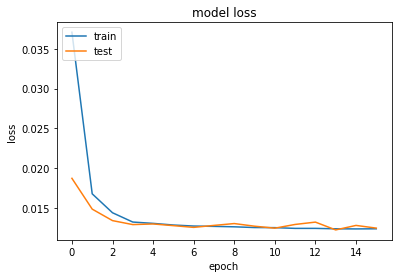

In [ ]:
#학습 진행률 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#예측 
predictions = model.predict(x_test)

#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.00872270795016601

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


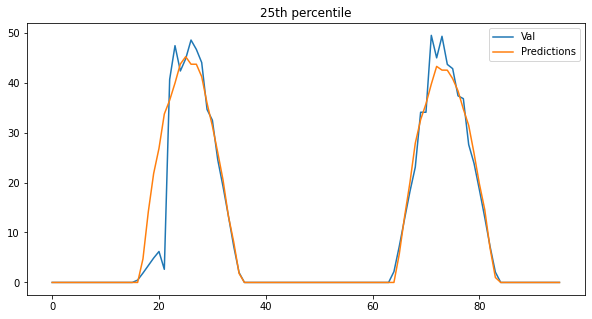

In [ ]:
#정규화한 것을 실제값으로 변환
val = target_scaler.inverse_transform(y_test)
predic = target_scaler.inverse_transform(predictions)

#시각화 
plt.figure(figsize=(10,5))
plt.title('25th percentile')
plt.plot(val[2500])
plt.plot(predic[2500])
plt.legend(['Val', 'Predictions'], loc = 'low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


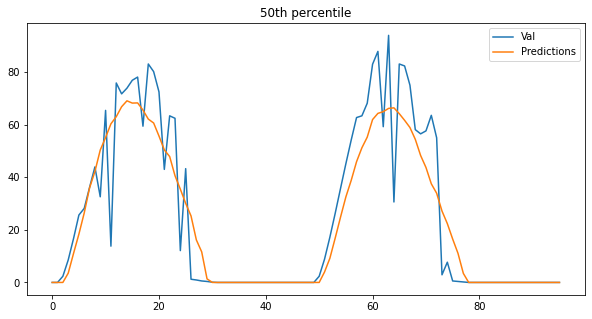

In [ ]:
#시각화 
plt.figure(figsize=(10,5))
plt.title('50th percentile')
plt.plot(val[5000])
plt.plot(predic[5000])
plt.legend(['Val', 'Predictions'], loc = 'low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


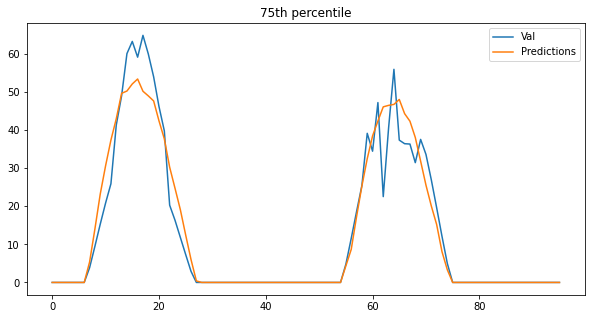

In [ ]:
#시각화 
plt.figure(figsize=(10,5))
plt.title('75th percentile')
plt.plot(val[7500])
plt.plot(predic[7500])
plt.legend(['Val', 'Predictions'], loc = 'low')